### **Machine Learning Modelling - UTS Model Deployment**
##### Patricia Pepita - 2602174176

### No 1

##### **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### **Read Data**

In [3]:
df = pd.read_csv('data_D.csv')

##### **EDA**

In [4]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [5]:
df.shape

(41259, 15)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0           int64
id                   int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
churn                int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [9]:
check_values = df[['Geography', 'Gender', 'NumOfProducts',
                   'HasCrCard', 'IsActiveMember', 'churn']]

for i in check_values:
  print(df[i].value_counts())
  print('\n')

Geography
France     23520
Spain       9081
Germany     8658
Name: count, dtype: int64


Gender
Male      23166
Female    18093
Name: count, dtype: int64


NumOfProducts
2    21132
1    19316
3      694
4      117
Name: count, dtype: int64


HasCrCard
1    31126
0    10133
Name: count, dtype: int64


IsActiveMember
0    20767
1    20492
Name: count, dtype: int64


churn
0    32540
1     8719
Name: count, dtype: int64




I drop the 4 columns (which are Unamed, ID, CustomerID, Surname) because they are not related to the objective of the data modelling.

In [10]:
new_df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)

### **Data Splitting**

#### 80% training set, 20% testing set

In [11]:
input_df = new_df.drop('churn',axis=1)
output_df = new_df['churn']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)

#### Check Missing Values in Each Splitted Dataset

In [13]:
x_train.isnull().sum()

CreditScore        4
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [14]:
x_test.isnull().sum()

CreditScore        4
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [15]:
y_train.isnull().sum()

0

In [16]:
y_test.isnull().sum()

0

There are 4 missing values on the INPUT training & testing data on 'CreditScore' column. I will do the missing value imputation but I look at the distribution of the data first.

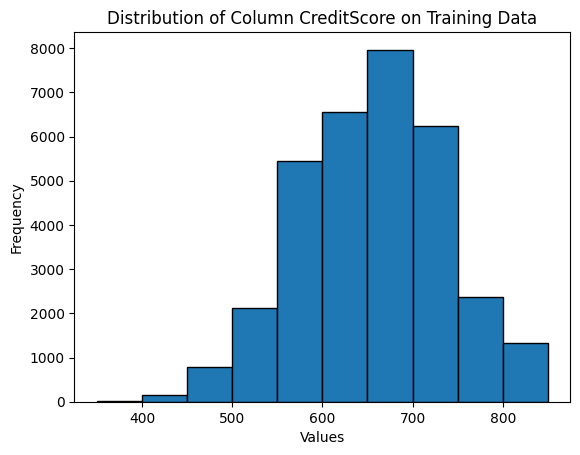

In [17]:
plt.hist(x_train['CreditScore'], edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Column CreditScore on Training Data')
plt.show()

The distribution is morelikely to be normal/gaussian, so I choose to do the missing value imputation by mean instead of median

In [18]:
mean = x_train['CreditScore'].mean()

x_train['CreditScore'] = x_train['CreditScore'].fillna(mean)

In [19]:
x_train['CreditScore'].isnull().sum()

0

In [20]:
x_test['CreditScore'] = x_test['CreditScore'].fillna(mean)

In [21]:
x_test['CreditScore'].isnull().sum()

0

#### Now the missing value has been imputed

#### Label Encoder to Categorical Data Types

In [22]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Geography', 'Gender']

label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    x_train[column] = label_encoders[column].fit_transform(x_train[column])
    x_test[column] = label_encoders[column].fit_transform(x_test[column])

In [23]:
x_train['Geography'].value_counts()

Geography
0    18853
2     7283
1     6871
Name: count, dtype: int64

In [24]:
x_test['Geography'].value_counts()

Geography
0    4667
2    1798
1    1787
Name: count, dtype: int64

In [25]:
x_train['Gender'].value_counts()

Gender
1    18538
0    14469
Name: count, dtype: int64

In [26]:
x_test['Gender'].value_counts()

Gender
1    4628
0    3624
Name: count, dtype: int64

In [27]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
36757,681.0,0,0,35.0,6,0.00,1,1,0,159463.70
6639,727.0,0,1,58.0,9,103417.74,1,1,1,60988.21
18032,661.0,0,0,34.0,1,0.00,2,0,0,185555.63
25911,684.0,2,1,44.0,4,0.00,1,1,0,108872.45
40693,619.0,1,0,33.0,7,105204.01,2,0,1,138490.03


In [28]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
18771,697.0,1,0,62.0,8,115062.61,1,1,0,23305.01
19111,731.0,1,0,41.0,6,135919.33,1,1,0,95583.94
2861,778.0,2,0,25.0,8,157929.52,1,1,0,29333.06
11633,637.0,0,1,31.0,4,0.00,2,1,1,145553.33
22017,633.0,1,1,28.0,5,79871.02,1,1,0,125919.48


In [29]:
x_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

#### Check Outliers

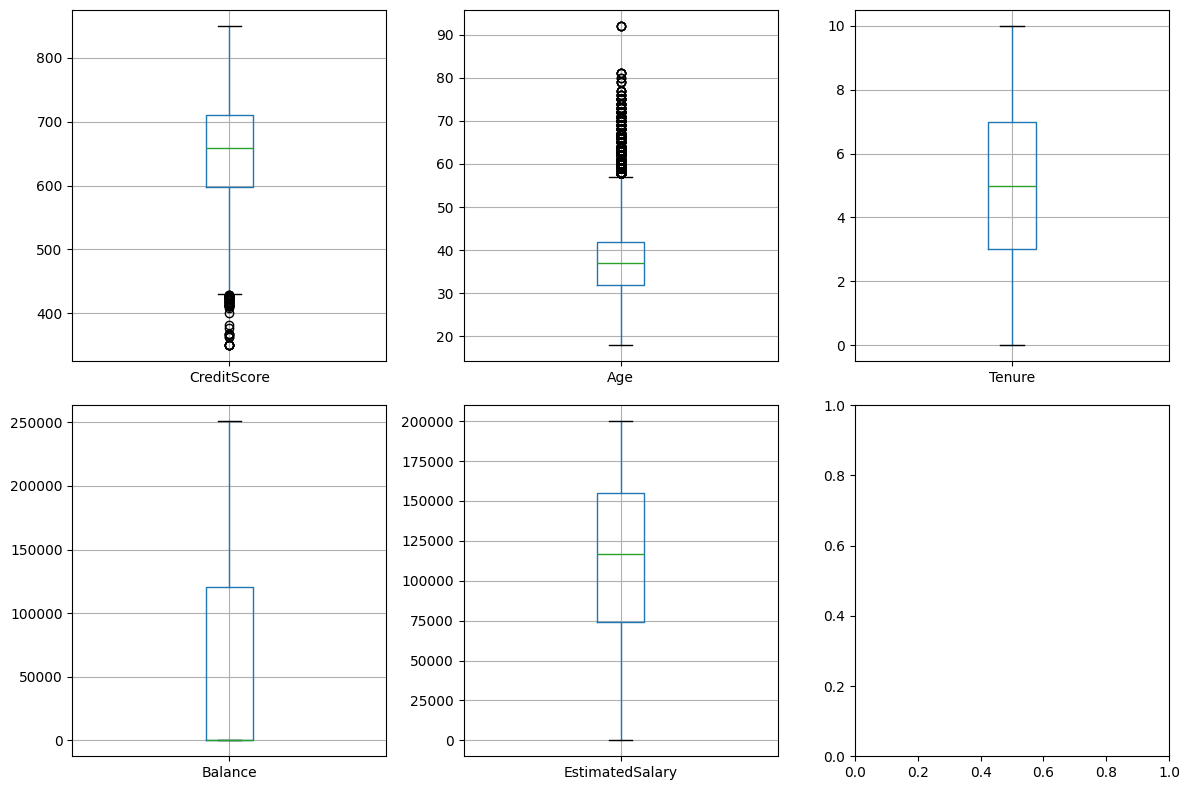

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

cs_boxplot = x_train.boxplot(column=['CreditScore'], ax=axes[0, 0])
age_boxplot = x_train.boxplot(column=['Age'], ax=axes[0, 1])
tenure_boxplot = x_train.boxplot(column=['Tenure'], ax=axes[0, 2])

balance_boxplot = x_train.boxplot(column=['Balance'], ax=axes[1, 0])
salary_boxplot = x_train.boxplot(column=['EstimatedSalary'], ax=axes[1, 1])

plt.tight_layout()
plt.show()

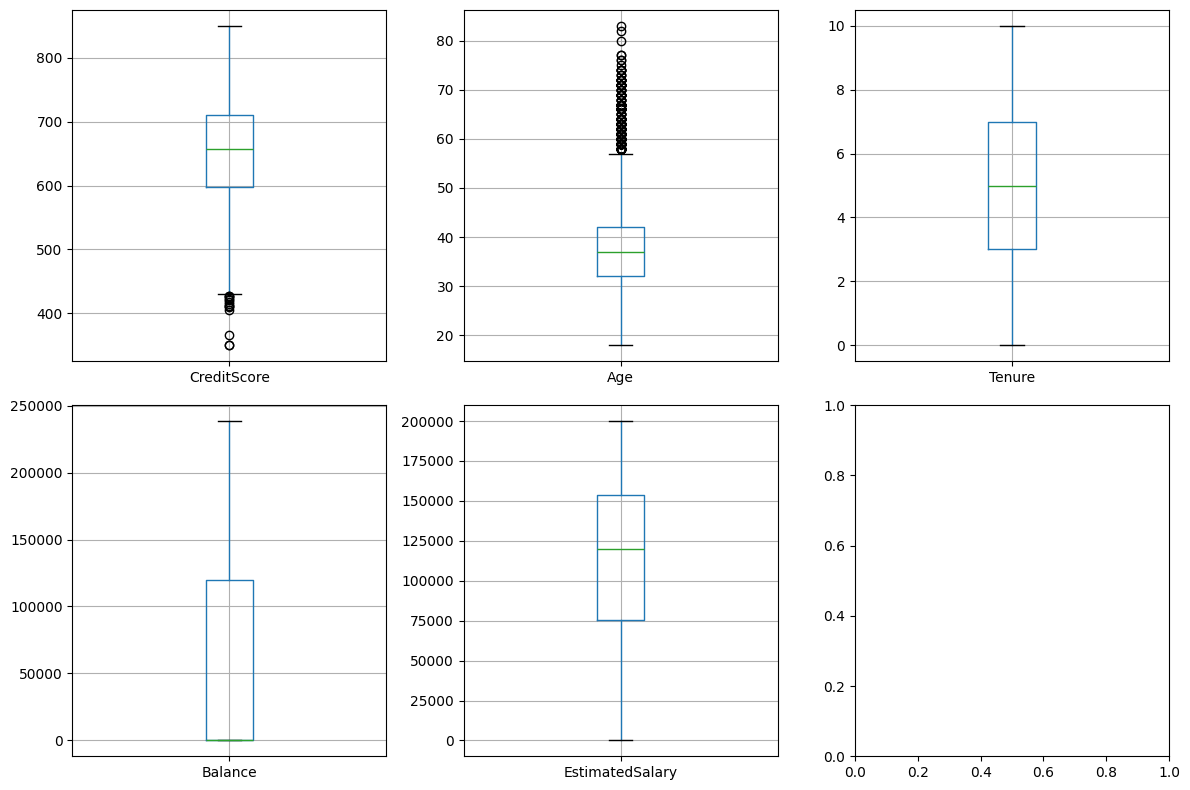

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

cs_boxplot = x_test.boxplot(column=['CreditScore'], ax=axes[0, 0])
age_boxplot = x_test.boxplot(column=['Age'], ax=axes[0, 1])
tenure_boxplot = x_test.boxplot(column=['Tenure'], ax=axes[0, 2])

balance_boxplot = x_test.boxplot(column=['Balance'], ax=axes[1, 0])
salary_boxplot = x_test.boxplot(column=['EstimatedSalary'], ax=axes[1, 1])

plt.tight_layout()
plt.show()

The CreditScore and Age column have many outliers on training & testing data set, but I won't handle them because recent algorithm can handle outliers well. I also have tried to handle the outliers by IQR method but it created no difference.

##### **Model 1: Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [35]:
y_predict=RF_class.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6499
           1       0.79      0.34      0.48      1753

    accuracy                           0.84      8252
   macro avg       0.82      0.66      0.69      8252
weighted avg       0.83      0.84      0.81      8252



In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7860892388451444
Recall: 0.3416999429549344
F1 Score: 0.4763419483101392


with Random Forest model, the accuracy hits 85% overall

#### **Hyperparameter Tuning for Random Forest Algorithm**

In [38]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [39]:
RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [40]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 8}
Accuracy : 0.8603326926542714


In [41]:
#Train the data using based parameter
RF_class_best = RandomForestClassifier(criterion= 'entropy',max_depth=8)

In [42]:
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8)

In [43]:
y_predict_best=RF_class_best.predict(x_test)

In [44]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7860892388451444
Recall: 0.3416999429549344
F1 Score: 0.4763419483101392


In [45]:
print(classification_report(y_test, y_predict_best, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6499
           1       0.76      0.48      0.59      1753

    accuracy                           0.86      8252
   macro avg       0.81      0.72      0.75      8252
weighted avg       0.85      0.86      0.84      8252



The accuracy went from 85% to 86% with hyperparameter tuning.

In [46]:
import pickle as pkl
filename = 'modelUTS.pkl'
pkl.dump(RF_class, open(filename, 'wb'))

##### **Model 2: XGBoost**

In [47]:
from xgboost import XGBClassifier

In [48]:
XGB_class = XGBClassifier()
XGB_class.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_predict= XGB_class.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6499
           1       0.69      0.55      0.61      1753

    accuracy                           0.85      8252
   macro avg       0.79      0.74      0.76      8252
weighted avg       0.84      0.85      0.85      8252



In [51]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6941852117731515
Recall: 0.551625784369652
F1 Score: 0.6147488874761603


with XGBoost algorithm, the accuracy shows 85% overall.

#### **Hyperparameter Tuning for XGBoost Algorithm**

In [52]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'eta':[0.01, 0.2],
    'max_depth':[2,4,6,8],
}

In [53]:
XGB_class2 = XGBClassifier()
XGB_class2= GridSearchCV(XGB_class2,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [54]:
XGB_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", XGB_class2.best_params_)
print("Accuracy :",XGB_class2.best_score_)

Tuned Hyperparameters : {'eta': 0.2, 'max_depth': 2}
Accuracy : 0.8635744283555946


In [55]:
XGB_class_best = XGBClassifier(eta=0.2,max_depth=2)

In [56]:
XGB_class_best.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [57]:
y_predict_best = XGB_class_best.predict(x_test)

In [58]:
precision = precision_score(y_test, y_predict_best)
recall = recall_score(y_test, y_predict_best)
f1 = f1_score(y_test, y_predict_best)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7422186751795691
Recall: 0.5305191100969766
F1 Score: 0.6187624750499002


In [59]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6499
           1       0.74      0.53      0.62      1753

    accuracy                           0.86      8252
   macro avg       0.81      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



#### **Conclusion**

The best accuracy is from Random Forest model with hyperparameter tuning and XGBoost model with hyperparameter tuning. They created 86% accuracy compared to other model which is only 85% accuracy.

I decided to choose the tuned Random Forest model since the precision is high (79%) compared to the tuned XGBoost model (74%).